## Deep Neural Network과 관련 학습 기능들을 구현하는 과제

# 1. 본 과제의 구성
* Part 1. 신경망 학습을 위한 환경설정
* Part 2. 데이터 추출 및 시각화
* Part 3. 가중치 설정
* Part 4. 비용 계산
* Part 5. 경사도 계산
* Part 6. 신경망 학습 수행

# 2. 본 과제의 목표
MLP 신경망의 중심이 되는 관련 내용들을 직접 구현하는 코드를 완성하여 현대 인공지능의 근간이 되는 기술에 대한 이해도를 높인다.



In [1]:
## Initialization

%reset -f


# Part 1. 신경망 학습을 위한 환경설정

#### 1) 먼저, 다층 퍼셉트론을 위한 각 계층별 노드 숫자를 설정한다.
다층 퍼셉트론은 일반적으로 입력층, 은닉층, 출력층으로 구성된 신경망을 의미한다. 따라서, 입력층의 노드 수, 은닉층의 노드수, 출력 층의 노드수를 각각 설정해 주어야 한다.
(여기까지는 작업이 완료되어 있으므로, 별도의 과제가 없다.)

#### 2) 모든 구현이 끝난 후, 본 파트로 돌아와 심층신경망을 구성할 수 있다.
심층신경망은 다층 퍼셉트론에서 은닉층의 숫자가 2개 이상일 때를 의미한다. 이에 따른 확장성을 위해 은닉층의 노드수를 배열로 설정한다. 즉, 은닉층의 숫자를 배열의 끝에 더하는 것만으로 간단한 형태의 심층신경망이 완성된다고 할 수 있다.


In [2]:
## 1) 신경망 환경 설정
input_layer_size  = 400;    # 20 x 20 Input Images of Digits
hidden_layer_size = [25];   # one hidden layer with 25 hidden units
output_layer_size = 10;     # 10 Output Classes for Digits
num_labels = 10;            # 10 labels, from 1 to 10
                            # (note that we have mapped "0" to label 10)


In [3]:
## 2) 신경망 환경설정 바꾸기
  # 모든 과제를 수행한 후 여기로 돌아와
  # 심층신경망이 되도록 위의 코드를 수정하여 아래에 추가해보자.

input_layer_size  = 400;    # 20 x 20 Input Images of Digits
hidden_layer_size = [64,32] # 3 hidden layers with 25 hidden units each
output_layer_size =10;     # 10 Output Classes for Digits
num_labels = 10;            # 10 labels, from 1 to 10
                            # (note that we have mapped "0" to label 10)

# Part 2. 데이터 추출 및 시각화

#### 1) 함수 displayData는 입력으로 하는 주어진 이미지 DataFrame을 시각화하는 함수이다.

함수 정의부 만으로는 출력이 생기지 않으나 이 함수를 사용하기 위해서는 본 코드 셀의 사전 실행을 필요로 한다.
본 파트에서는 D2-Hand-Writings.csv 의 정형 데이터를 올바르게 가져와서 아래와 같이 시각화를 하는 것이 목표이다..

#### 2) 샘플 파일로부터 데이터 불러와 displayData를 이용하여 시각화한다.

D2-Hand-Writings.csv파일을 pandas 라이브러리 함수를 이용하여 가져온다. 그 중 100개의 샘플을 랜덤으로 채취하여 손글씨 숫자들과 레이블을 비교하며 본인의 판단과 비교할 수 있다.

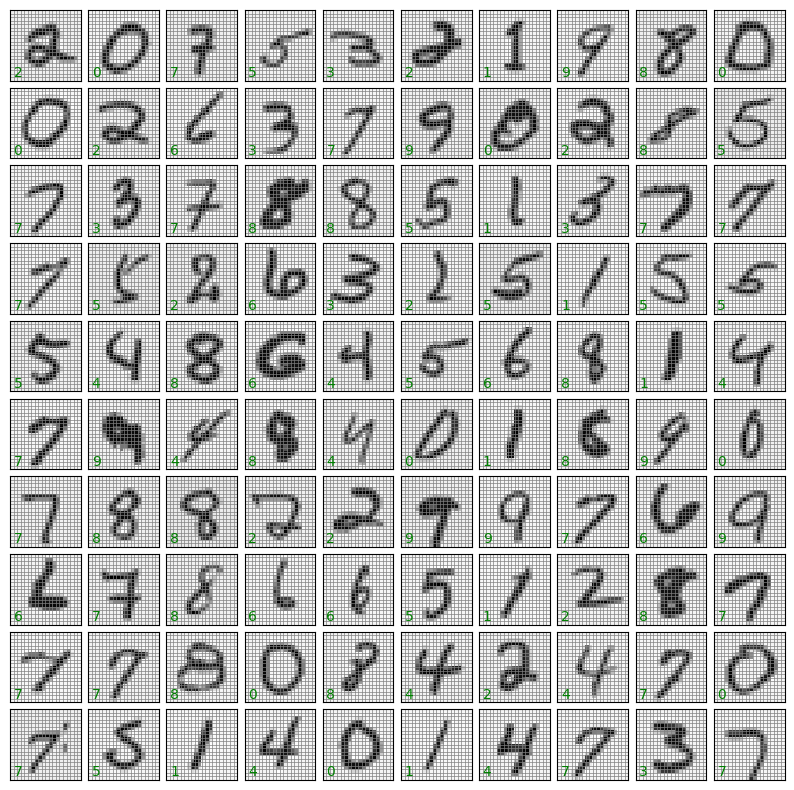

In [4]:
## 1) Digit 디스플레이 함수: 구현완료 (수정 불필요)

import numpy as np
import matplotlib.pyplot as plt

def plot_digits(df, labels, num_images=100):
    """
    DataFrame에서 손글씨 숫자 데이터 세트의 이미지를 그리드 형태로 시각화
    df: 이미지 데이터를 포함하는 DataFrame. 각 행이 하나의 이미지를 나타내고, 각 열이 픽셀 값을 나타냄
    labels: 각 이미지에 대한 레이블 데이터를 포함하는 Series 또는 리스트.
    num_images: 시각화할 이미지 수.
    """
    # 이미지의 크기를 계산합니다 (예: 8x8)
    example_width = int(np.round(np.sqrt(df.shape[1])))
    example_height = int(df.shape[1] / example_width)

    # 그리드의 크기를 계산합니다
    display_rows = int(np.floor(np.sqrt(num_images)))
    display_cols = int(np.ceil(num_images / display_rows))

    fig, axes = plt.subplots(display_rows, display_cols, figsize=(display_cols, display_rows),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image_data = df.iloc[i].to_numpy().reshape(example_height, example_width).T
            ax.imshow(image_data, cmap='binary', interpolation='nearest')
            ax.text(0.05, 0.05, str(labels[i] % 10), transform=ax.transAxes, color='green')

            # 연한 격자 표시 설정
            ax.set_xticks(np.arange(-.5, example_width, 1), minor=True)
            ax.set_yticks(np.arange(-.5, example_height, 1), minor=True)
            ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
            ax.tick_params(which="minor", size=0)
            ax.axis('on')

            # 주 그리드와 눈금 레이블을 제거하여 이미지에 집중할 수 있도록 함
            ax.grid(which="major", visible=False)
            ax.tick_params(which="major", size=0)
            ax.set_xticklabels([])
            ax.set_yticklabels([])

    plt.show()


(4999, 400)
(4999,)


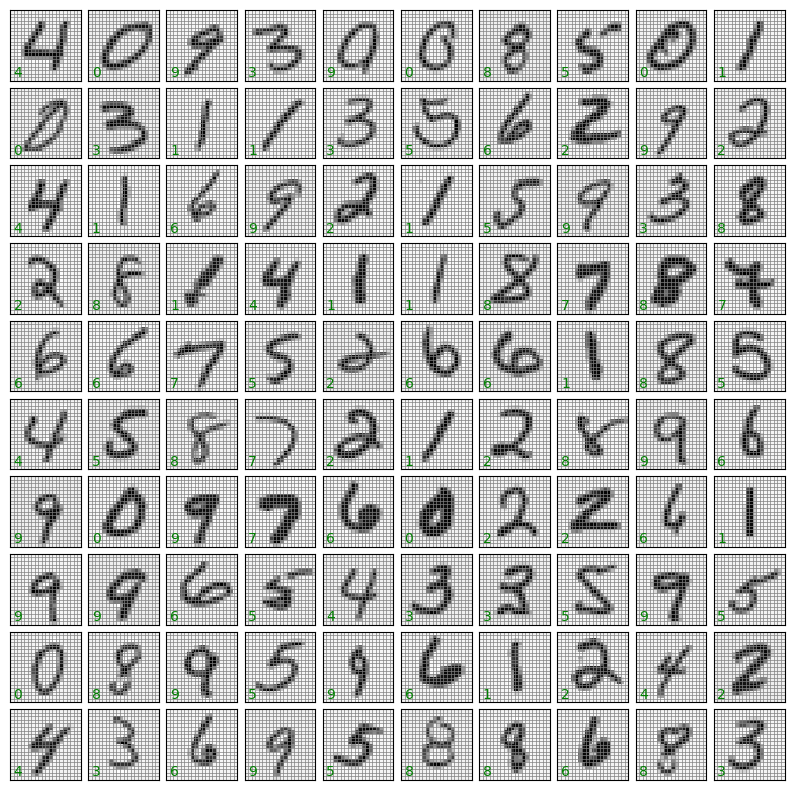

In [5]:
## 2) 파일 읽어오기: D2-Hand-Writings.csv
import pandas as pd

# pandas로 파일 읽어오기': 본인의 환경에 맞게 수정하라.
data = pd.read_csv("D2-Hand-Writings.csv", header=1)   # 수정할 코드

X = data.iloc[:, :-1] # 데이터의 X벡터 
y = data.iloc[:,  -1] # 데이터의 y벡터
print(X.shape)
print(y.shape)

# displayData 함수를 이용하여 시각화하기 (수정 불필요)
sample_X = X.sample(100)            # 랜덤한 100개의 샘플을 채취
sample_y = y.iloc[sample_X.index]   # 샘플에 대한 레이블 채

plot_digits(sample_X, sample_y.values, num_images=100)


# Part 3. Parameter 설정

#### 1) 본 파트에서 Parameter의 의미는 연결되는 계층 사이의 Edge, 즉, 가중치 (Weight)를 의미한다.

3층 MLP의 계층 사이의 가중치는 2개이다.
먼저, 이 중 입력층과 은닉층의 가중치는 (input_layer_size, hidden_layer_size[0])으로 표현할 수 있다. 여기에 은닉층에 추가될 편향을 고려하면 (input_layer_size + 1, hidden_layer_size[0])가 최종 크기가 되어야 한다.

다음으로, 은닉층과 출력층 사이의 가중치는 (hidden_layer_size[0], output_layer_size)로 표현된다.

아래과 같이 변수가 작명되어 있다.

* wij: i층과 j층 사이의 Parameter (Weight)를 저장하는 변수

* w01_size: 은닉층을 기준으로 0번째 층은 항상 입력층, 1은 첫번째 은닉층
* w12_size: 출력층은 k층일 때 항상 k-1층, 본 코드에서는 3층 MLP이므로 2층이 출력증

#### 2) 가중치 초기값을 적절히 설정한다.
방법은 여러가지가 있다. (i) 0 초기화, (ii) [0, 1]의 랜덤한 실수 등

먼저, 0 초기화를 수행한다.
여기까지 수행했다면 입력층 - 가중치 - 은닉층 - 가중치 - 출력층의 크기를 순서대로 확인해보자.

#### 3) 가중치 행렬 초기화의 일반화를 고려할 수 있다.
각 계층의 크기는 input_layer_size, hidden_layer_size, output_layer_size에 저장되어 있으므로 반복문을 이용하면 설정 가능하다. 단, 모든 w를 하나의 텐서에 저장하는 것은 쉬운 문제가 아니다.
모든 계층의 크기가 같을 때에는 같은 크기의 하나의 텐서로 저장하기 수월하다. 그러나 그렇지 않으므로 다른 방법을 고려해야 한다.

## 2) 신경망 환경설정 바꾸기
  # 모든 과제를 수행한 후 여기로 돌아와
  # 심층신경망이 되도록 위의 코드를 수정하여 아래에 추가해보자.

input_layer_size  = 400;    # 20 x 20 Input Images of Digits
hidden_layer_size = [64,32] # 3 hidden layers with 25 hidden units each
output_layer_size =10;     # 10 Output Classes for Digits
num_labels = 10;            # 10 labels, from 1 to 10
                 

In [6]:
## 1) Parameter 크기 설정하기
w01_size = (input_layer_size + 1, hidden_layer_size[0])  # 입력층과 은닉층 사이의 가중치 크기
w12_size = (hidden_layer_size[0]+1, hidden_layer_size[1])      # 은닉1 층과 은닉2 층 사이의 가중치 크기
w23_size = (hidden_layer_size[1]+1, output_layer_size)      # 은닉2 층과 출력층 사이의 가중치 크기
 

# 가중치 크기 출력하기
print("w01_size:", w01_size)
print("w12_size:", w12_size)
print("w23_size:", w23_size)

w01_size: (401, 64)
w12_size: (65, 32)
w23_size: (33, 10)


In [7]:
## 2) 가중치 행렬 설정하기:
# 0행렬 설정
# w01_size 는 [int,int] 형태의 튜플이므로 w01_size[0]은 행의 크기, w01_size[1]은 열의 크기를 의미한다.
w01 = np.zeros((input_layer_size+1,hidden_layer_size[0])) # 입력층과 은닉층 사이의 가중치 행렬을 0으로 초기화 np.zeros로 0인 배열을 생성
w12 = np.zeros((hidden_layer_size[0]+1,hidden_layer_size[1])) # 은닉 1층과 은닉 2층 사이의 가중치 행렬을 0으로 초기화
w23 = np.zeros((hidden_layer_size[1]+1,output_layer_size)) # 은닉 2층과 출력층 사이의 가중치 행렬을 0으로 초기화

# 가중치 행렬 출력하기
print("w01:\n", w01)
print("w12:\n", w12)
print("w23:\n", w23)
# 랜덤한 실수로 초기화
w01 = np.random.rand(input_layer_size+1, hidden_layer_size[0]) * 0.01 # 입력층과 은닉층 사이의 가중치 행렬을 랜덤한 실수로 초기화
w12 = np.random.rand(hidden_layer_size[0]+1, hidden_layer_size[1]) * 0.01 # 은닉 1층과 은닉 2층 사이의 가중치 행렬을 랜덤한 실수로 초기화
w23 = np.random.rand(hidden_layer_size[1]+1, output_layer_size) * 0.01 # 은닉 2층과 출력층 사이의 가중치 행렬을 랜덤한 실수로 초기화

# 가중치 행렬 출력하기
print("w01:\n", w01)
print("w12:\n", w12)
print("w23:\n", w23)


w01:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
w12:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
w23:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [26]:
## 3) 가중치 행렬 초기화식의 일반화
  # 은닉층이 2개 이상인 DNN에서는
  # 반복문을 이용한 초기화가 가능할 것이다.
##반복문으로 가중치 행렬을 초기화 한다.
layer_sizes = [input_layer_size] + hidden_layer_size + [output_layer_size] # 각 층의 노드 수를 저장한 리스트
print("layer_sizes:", layer_sizes)
weights = [] # 각 층의 가중치를 저장할 리스트

for i in range(len(layer_sizes)-1): # 각 층의 가중치 행렬을 랜덤한 실수로 초기화
    weights.append(np.random.rand(layer_sizes[i] + 1, layer_sizes[i+1]) * 0.01) # i번째 층과 i+1번째 층 사이의 가중치 행렬을 랜덤한 실수로 초기화


  # 모든 과제를 끝낸 후
  # 심층 신경망의 구현을 하고자 한다면,
  # 본 섹션에 i) 반복문을 이용한 자동화와
    # ii) 단일 변수를 이용한 모든 가중치의 관리
    # 하는 코드를 작성하라.

layer_sizes: [400, 64, 32, 10]


In [24]:
# 전체 행렬 크기 순서대로 확인하기
print("input_layer: ", input_layer_size)
print("w01 (", w01_size, ")")
print("hidden_layer: ", hidden_layer_size[0])
print("w12 (", w12_size, ")")
print("hidden_layer: ", hidden_layer_size[1])
print("output_layer: ", output_layer_size)


input_layer:  400
w01 ( (401, 64) )
hidden_layer:  64
w12 ( (65, 32) )
hidden_layer:  32
output_layer:  10
[400, 64, 32, 10]


In [10]:
# 반복문으로 초기화된 가중치 행렬 크기 출력하기
for i in range(len(weights)):
    print("w", i, "(", weights[i].shape, ")")




w 0 ( (401, 64) )
w 1 ( (65, 32) )
w 2 ( (33, 10) )


# Part 4. 비용의 계산 (Feedforward)

#### 1) Activation Function의 정의 및 실행 준비
비용을 계산하기 위해서는 먼저 기반이 되는 함수들을 먼저 설정해야 한다.
##### a) Activation Function의 정의
*   Logi: Logistic Function
*   Tanh: Hyperbolic Tangent
*   Relu: Rectified Linear Unit

##### b) Activation Function에 대한 Callback 정의
*   Set: 사용할 활성 함수를 설정하는 함수
*   Call: 설정된 활성 함수를 호출하는 함수

본디, 각 계층별로 사용할 활성 함수를 다르게 설정할 수 있어야 한다.
하지만 구현의 편의를 위해 현 시점에서는 하나로 통일을 하는 구현을 한다.

##### c) 계층별 활성함수의 설정
본 과제에서는 별도로 다루지는 않으나, 추가구현할 수 있다.

#### 2) Cost Function 계산 준비
##### a) 필요 함수 정의
* y레이블을 one-hot 코드로 변환:
신경망의 출력층의 정의 맞게 레이블 수에 따라 y레이블을 원핫 코드로 변환한다.
* Cost Function의 정의: SSE, Cross Entropy.

#### b) Cost Callback의 정의
두 함수를 먼저 정의하고 Activation Function가 유사하게 하나를 설정하여 사용할 수 있도록 callback을 정의한다.

기본값으로 SSE를 사용하도록 한다.

### 3) Cost 계산하기 (Frontpropagation)
##### a) 입력 X에 편향에 대한 상수 추가하기
편향 상수를 1로 하여 0번째 X의 속성으로 추가한다.

##### b) Cost 계산 과정을 선 수행해보기
* i] 입력 X의 가장 왼쪽에 편향상수 1 추가


* ii] 입력 X와 W01을 행렬곱
* iii] [ii]의 결과를 Activation 함수의 인자로 넣기
* iv] [iii] 실행하여 출력
* v] [iv]의 결과를 입력으로 하기
* vi] [v]와 W12를 행렬곱
* vii] [vi]의 결과를 Activation 함수의 인자로 넣기
* viii] [vii] 실행하여 출력
* ix] [viii]과 y레이블을 one-hot로 비용계산하기

#### c) (b)의 과정을 함수로 만들기
[i] ~ [viii]까지를 front_propa 함수로 정의하고,
[ix]를 별도로 하여 total_cost_func로 정의하라.

함수 헤더를 미리 작성해두었으니, 함수 바디만 작성하면 된다.

In [11]:
## 1) Activation Function의 구현

## a) Activation Function의 정의
# Logistic Function
def logi_func(x):
    x_clipped = np.clip(x, -709, 709)     # 지수함수의 오버플로우 방지 코드 (수정금지)
    # 아래의 return 구문을 수정하여 logistic 함수 정의
    return 1 / (1 + np.exp(-x_clipped))  # 1 / 1 + e^(-x)

# Hyperbolic Tangent Function
def tanh_func(x):
    #하이퍼볼릭 탄젠트의 식
    # 하이퍼볼릭 탄젠트 함수는 (e^x - e^-x) / (e^x + e^-x)로 정의된다.
    #여기서 e는 자연상수입니다. 이 함수는 -1과 1 사이의 값을 반환하며,
    #신경망에서 활성화 함수로 널리 사용된다.
    # tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
    return np.tanh(x)       # tahnh 함수 정의

# ReLU Function
def relu_func(x):
    #ReLU 함수는 입력값 x가 0보다 클 경우 x를 그대로 반환하고,
    #0 이하일 경우 0을 반환한다. 이 함수는 신경망에서 은닉층의
    #활성화 함수로 많이 사용되며, 특히 깊은 네트워크에서 선호된다.
    #이는 그 구조가 간단하고 계산이 빠르기 때문이다. 또한,
    #ReLU는 특정 조건에서 기울기 소실 문제를 줄여준다.

    return np.maximum(0, x) # ReLU 함수 정의 

## b) Activation Function Callback의 정의 (이하 수정금지)
  # Hyperparameter에 따라 Activation Function을 선택하여 호출하는 Activation 함수의 정의
# 현재 설정된 활성화 함수를 저장할 전역 변수: 기본값 logi_func
cur_activ_func = logi_func

# 활성화 함수 설정 함수
def set_activ_func(func):
    global cur_activ_func
    cur_activ_func = func

# 설정된 활성화 함수 호출 함수
def call_activ_func(x):
    return cur_activ_func(x)


In [12]:
## 2) Cost Function의 정의

## a) 필요 함수 정의하기:
  # y레이블을 one-hot 코드로 변환하는 함수
def one_hot_encode(y_true, n_label=None): #원핫인코딩 함수 정의
    if n_label is None: #레이블이 없을 경우
        n_label = np.max(y_true)  #레이블의 최대값을 n_label로 지정
    return np.eye(n_label)[y_true - 1]  #원핫인코딩된 레이블을 반환

  # 제곱 오차 합 (SSE: Sum of Mean Squared Errors)함수 정의
def sse_cost(y_true, y_pred):
    """
    Sum of Mean Squared Errors

    args :
    y_true: 실제 값 리스트
    y_pred: 예측 값 리스트

    return:
    제곱 오차 합

    설명 : SSE는 모델의 예측값과 실제값 사이의 차이를 제곱여 합한 값이다.
    모델의 오차를 측정하는데 사용
    SSE의 값이 작을수록 모델의 성능이 좋다고 평가 가능.
    """
    
    return 0.5 * np.sum((np.array(y_true) - np.array(y_pred)) ** 2) #반환

  # Cross Entropy Error Cost Function
def categorical_cross_entropy_cost(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    # 각 클래스에 대한 예측 확률에 로그를 취하고, 실제 레이블과의 곱을 취한 뒤, 모든 클래스에 대해 합산
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]


## b) Hyper Pameter에 따라 Cost Function을 선택하여 호출하는 Cost 함수의 정의 (수정 금지)
# 현재 설정된 Cost 함수를 저장할 전역 변수
cur_cost_func = sse_cost

# Cost 함수 설정 함수
def set_cost_func(func):
    global cur_cost_func
    cur_cost_func = func

# 설정된 Cost 함수 호출 함수
def call_cost_func(y_true, y_pred):
    return cur_cost_func(y_true, y_pred)


In [13]:
## 3) Cost 계산하기 (Frontpropagation)
## a) y 레이블을 one-hot 코드로 표현하기
y_onehot = one_hot_encode(y)       # 수정할 코드
print(y)
print(y_onehot)

## b) Cost 계산 과정을 선 수행해보기

# 입력층, 은닉층, 출력층
# 입력층의 입력과 출력 Xb, a0b
# 은닉층의 입력 in1, 출력 a1
# 출력층의 입력 in2, 출력 a2

# i] 입력 X에 편향에 대한 상수 추가
Xb = np.hstack([np.ones((X.shape[0], 1)), X])                     # 입력값에 편향 상수 추가

# 입력층 출력 a0b 출력하기
a0b = Xb 
# ii] 은닉층의 입력 in1 계산
in1 = np.dot(Xb, w01)                                 # 입력값*편향상수 와 가중치의 행렬곱 
# iii] 은닉층의 출력 a1 계산
a1 = call_activ_func(in1)  # 수정할 코드
# iv] 은닉층의 출력 a1 출력하기
print("a1 = ", a1)
# v] 은닉층의 출력을 출력층의 입력으로 하기
a1 = np.hstack([np.ones((a1.shape[0], 1)), a1])
# vi] 출력층의 입력 in2 계산하기
in2 = np.dot(a1 , w12)                                   # 은닉층의 출력과 가중치의 행렬곱 
# vii] 출력층의 출력 a2 계산하기
a2 = call_activ_func(in2)                                   # 활성함수 적용
# viii] 결과 출력
print("a2 = ", a2)

#출력층 
a2 = np.hstack([np.ones((a2.shape[0], 1)), a2])
in3= np.dot(a2, w23)
a3= call_activ_func(in3)
print("a3 = ", a3)
# ix] y_onehot과 a2로 비용 계산하기
J = cur_cost_func(y_onehot, a3)             # 비용 계산

print("Calculated Cost: ", J)

## c) (b)의 과정을 Cost Function으로 만들어내기
def front_propag(w01, w12,w23, X, y):
    #입력 x에 편향에 대한 상수 추가
    Xb = np.hstack([np.ones((X.shape[0], 1)), X])   #  편향 상수 추가
    a0b = Xb                        # 입력층 출력 a0b
    #첫번째 은닉층 계산
    in1 = np.dot(Xb, w01)                         # 은닉층 입력 계산 ((입력* 편향) * 가중치)
    a1 = call_activ_func(in1)        # 은닉층 출력 a1
    a1 = np.hstack([np.ones((a1.shape[0], 1)), a1])     # 은닉층 출력을 은닉2층 입력으로
    #두번째 은닉층의 계산
    in2 = np.dot(a1 , w12)                         # 은닉층 입력 계산 ((은닉층 출력 * 편향) * 가중치)
    a2 = call_activ_func(in2)         # 은닉층2 출력 a2

    #출력층의 계산
    a2 = np.hstack([np.ones((a2.shape[0], 1)), a2])
    in3 = np.dot(a2, w23)
    a3 = call_activ_func(in3)

    return a3, a2, a1, a0b, in3, in2, in1    # 반환

def total_cost_func(w01, w12, w23, X, y):
    a3, _, _, _, _, _, _, = front_propag(w01, w12, w23, X, y)   # 수정금지

    return cur_cost_func(y_onehot, a3)      # 원핫코드와 a3으로 비용 계산

J = total_cost_func(w01, w12, w23, X, y)
print("f_Cost_test = ", J)

0       10
1       10
2       10
3       10
4       10
        ..
4994     9
4995     9
4996     9
4997     9
4998     9
Name: 10, Length: 4999, dtype: int64
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
a1 =  [[0.59035326 0.58891011 0.59111671 ... 0.59025029 0.58805895 0.5873849 ]
 [0.58972392 0.59509588 0.59979715 ... 0.58773189 0.58683131 0.59751407]
 [0.59014886 0.59751918 0.60128295 ... 0.58863029 0.59003036 0.59714448]
 ...
 [0.53796596 0.54436624 0.54385924 ... 0.55111091 0.54288155 0.54668205]
 [0.57592569 0.58315212 0.59089137 ... 0.59177355 0.58243997 0.59223042]
 [0.58183144 0.59016359 0.58366584 ... 0.59089747 0.58606757 0.58778101]]
a2 =  [[0.54971461 0.54651084 0.55225636 ... 0.54787481 0.54503618 0.55388325]
 [0.55001814 0.54681428 0.55254211 ... 0.54819785 0.54534587 0.55418275]
 [0.55011518 0.54689434 0.55267651 ... 0.54829334 0.54544006 0.5542923 ]
 ...
 [0.54

# Part 5. 경사도 계산하기

#### 1) 경사도를 계산하는 데에는 활성함수의 도함수를 먼저 필요로 한다.
Tanh의 도함수는 미리 정의해두었다.
* Logistic 함수를 미분하고 함수로 형태를 정의해보라.
* Relu 함수는 미분 불가능한 함수이지만 구간에 대해 미분할 수 있다. 모양을 그리고 정의해보자.

##### a) Activation Function의 도함수 정의
*   Logi': Logistic Function의 도함수 (logi_func_deriv)
*   Tanh': Hyperbolic Tangent (tanh_func_deriv)
*   Relu': Rectified Linear Unit (relu_func_deriv)

여기까지 정의가 완료되었으면 [-1, -0.5, 0, 0.5, 1]의 값에 대해 logi_func_deriv의 값을 출력해보자.

그리고 나머지 두 개 Gradient 함수에 대해서도 결과를 출력해보자.

#### 2) 역전파 알고리듬을 작성해보자.
이 과정은 Front-propa 함수를 반환값을 이용해야 한다. 따라서 함수 헤더에는 X, y뿐 아니라 a2, a1, a0, w12, w01까지 인자로 받아야 한다. 강의노트의 역전파 학습 부분을 참고하여 함수의 body를 완성하라.


In [14]:
## 1) Gradient의 계산

## a) 각 비용함수의 도함수 정의
# Derivative of Logistic Function
def logi_func_deriv(x):
    sigmoid = 1 / (1+np.exp(-x)) #시그모이드 함수
    return sigmoid * (1 - sigmoid) #시그모이드 함수의 도함수

# Derivative of Hyperbolic Tangent Function
def tanh_func_deriv(x):
    return 1 - np.tanh(x) ** 2 # 하이퍼볼릭 탄젠트 함수의 도함수

# Derivative of ReLU Function
def relu_func_deriv(x):
    return np.where(x > 0, 1, 0) # ReLU 함수의 도함수

## 아래는 수정 금지
# 현재 설정된 Gradient 함수를 저장할 전역 변수
cur_grad_func = logi_func_deriv

# Gradient 함수 설정 함수
def set_grad_func(func):
    global cur_grad_func
    cur_grad_func = func

# 설정된 Gradient 함수 호출 함수
def call_grad_func(x):
    return cur_grad_func(x)


In [15]:
## b) 각 도함수의 형태 확인하기 (수정할 코드는 없음)
sample = np.array([-1, -0.5, 0, 0.5, 1])

set_grad_func(logi_func_deriv)
g = call_grad_func(sample)
print("Gradient of Logi Func = ", g)

set_grad_func(tanh_func_deriv)
g = call_grad_func(sample)
print("Gradient of Tanh Func = ", g)

set_grad_func(relu_func_deriv)
g = call_grad_func(sample)
print("Gradient of Relu Func = ", g)

set_grad_func(logi_func_deriv)


Gradient of Logi Func =  [0.19661193 0.23500371 0.25       0.23500371 0.19661193]
Gradient of Tanh Func =  [0.41997434 0.78644773 1.         0.78644773 0.41997434]
Gradient of Relu Func =  [0 0 0 1 1]


In [16]:
## 2) 역전파 (Backpropagation) 학습 정의하기

def back_propag(a3, a2, a1, a0, in3, in2, in1, X, y_onehot):
    # 강의노트의 오류 역전파 수식을 바탕으로 아래에 코드를 완성하

    #backpropagation을 이용하여 가중치의 그래디언트를 계산하는 함수
    #a3 : 출력층의 출력
    #a2: 은닉2층의 출력
    #a1: 은닉층의 출력
    #a0: 입력층의 출력
    #in3: 출력층의 입력
    #in2: 은닉2층의 입력
    #in1: 은닉층의 입력
    #X: 입력 데이터
    #y_onehot: 원핫인코딩된 레이블
    
    # 출력층의 오류 전파
    delta3 = (a3 - y_onehot) * call_grad_func(in3)
    grad23 = np.dot(a2.T, delta3)  

    # 은닉층 오류 전파
    delta2 = np.dot(delta3, w23[:-1].T) * call_grad_func(in2)  # w23에서 bias를 제외해야 함
    grad12 = np.dot(a1.T, delta2)   
    
    # 입력층 오류 전파
    delta1 = np.dot(delta2, w12[:-1].T) * call_grad_func(in1)  # w12에서 bias를 제외해야 함
    grad01 = np.dot(a0.T, delta1)  # a0는 bias가 포함된 상태라 가정
    
   

    return grad23, grad12, grad01  


# Part 6. 신경망 학습 수행하기

#### 0) 가중치 초기화하기
* Vectorization: 연산 속도를 높이기 위한 입력의 벡터화
* Uniform Random Initialization: [0, 1]의 실수 중 무작위로 가중치를 서로 다르게 초기화
* Function callback Initialization: 손실, 경사, 비용 함수의 설정

위에 대한 초기 손실 값을 먼저 계산하여 확인한다.
주어진 환경에서는 약 22,500 근방의 값이 확인될 것이다.

#### 1) 순수 역전파 학습 수행하기
경사하강의 원리를 적용하여 반복 학습을 수행한다. 해야할 일은 다음과 같다.
* 순전파: a0에서 a2까지 계산과정 완성하기 (front_propag 함수 수행)
* 역전파: grad12와 grad01까지의 오류 전파 완성하기 (back_propag 함수 수행)
* 가중치 업데이트: w = w - alpha * gradient의 수식에 따라 가중치 업데이트 (강의노트 참고)

본 단계에서 코드의 수정은 필요하지 않다. 단, front_propag 함수화 back_propag 함수를 제대로 구현하였다면 오류없이 수행될 것이다. 또한, 1000번의 epoch후의 손실값은 약 18,500의 값을 기록할 것이다.

#### 2) 모멘텀이 있는 역전파 학습 수행하기
(2)의 과정에 모멘텀을 추가한다.
* 모멘텀 추가: 모멘텀의 정의에 따라 수식을 추가하라.

alpha = 0.02, momentum = 0.5으로 설정되어 있을 경우 1000번의 epoch 후의 손실값은 약 14,400이 될 것이다.

#### 3) 예측 수행하기
현재의 초 매개변수 설정으로 epoch을 크게하여 손실이 약 650에 도달하면 본 모델의 성능은 Accuracy가 89~90% 범위에 있게 된다.

만약 학습의 속도를 빠르게 하고 싶다면, 활성함수와 경사함수, 손실을 변경하여 관찰해야 한다.

In [17]:
## 0) 가중치 초기화 및 기타 초 매개변수 설정 (수정 불필요)

# 빠른 연산을 위한 DataArray로의 변환
X_arr = X.to_numpy()
y_arr = y.to_numpy()

# gradient 함수를 logistic의 도함수로 설정
set_activ_func(logi_func)
set_grad_func(logi_func_deriv)
set_cost_func(sse_cost)

# 랜덤한 실수로 가중치를 초기화
w01 = np.random.rand(w01_size[0], w01_size[1])
w12 = np.random.rand(w12_size[0], w12_size[1])
w23 = np.random.rand(w23_size[0], w23_size[1])
# 설정된 초 매개변수에 대한 초기 손실함수값 출력
J = total_cost_func(w01, w12, w23, X_arr, y_arr)
print("f_Cost_test = ", J)


f_Cost_test =  22495.492770785022


In [ ]:
## 1) 모멘텀이 없는 순수 역전파 학습 수행하기
# 랜덤한 실수로 가중치를 초기화
w01 = np.random.rand(w01_size[0], w01_size[1])
w12 = np.random.rand(w12_size[0], w12_size[1])
w23 = np.random.rand(w23_size[0], w23_size[1])
print("w01 and w12 are all initialized with random values in [0, 1].")

# 학습률 변수 초기화
alpha = 0.02

# 배치 크기 설정
batch_size = 32  # 또는 당신의 데이터셋에 적합한 다른 크기
num_batches = int(np.ceil(X.shape[0] / batch_size))

# 종료 조건 설정
n_epochs = 1000
gradient_threshold = 1e-8

J_history = [J]
for epoch in range(n_epochs):
    # 데이터를 무작위로 섞기
    indices = np.arange(X.shape[0])  # X의 길이만큼 인덱스 배열 생성
    np.random.shuffle(indices)       # 인덱스 배열을 무작위로 섞음
    X_shuffled = X_arr[indices]          # 섞인 인덱스에 따라 X를 섞음
    y_shuffled = y_arr[indices]          # 섞인 인덱스에 따라 y를 섞음

    for batch in range(num_batches):
        # 배치 데이터 가져오기
        start = batch * batch_size
        end = min(start + batch_size, X_arr.shape[0])
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # 편향 항 추가
        y_onehot_batch = one_hot_encode(y_batch, 10)

        # 출력 계산: 순전파
        a3, a2, a1, a0, in3, in2, in1 = front_propag(w01, w12,w23, X_batch, y_onehot_batch)

        # 경사도 계산: 역전파 학습
        grad23, grad12, grad01 = back_propag(a3, a2, a1, a0, in3, in2, in1, X_batch, y_onehot_batch)
        # 순수 역전파를 사용한 가중치 업데이트
        w23 -= alpha * grad23
        w12 -= alpha * grad12
        w01 -= alpha * grad01

    if epoch % 100 == 0:
      # 에포크의 끝에서 손실 계산 및 출력
      J = total_cost_func(w01, w12, w23, X, y)
      print(f"Epoch {epoch}: Cost = {J}")

      # 그래디언트 크기가 임계값 이하면 학습 종료
      if np.linalg.norm(grad01) + np.linalg.norm(grad12) + np.linalg.norm(grad23) < gradient_threshold:
          print(f"Stopped at epoch {epoch}: Gradient norm below threshold.")
          break

      # 오차가 650 미만이면 학습 종료 (거의 최적)
      if J < 650:
          print(f"Stopped at epoch {epoch}: Cost below 650.")
          break

      # J_history.append(J)

print(f"Epoch {epoch + 1}: Cost = {J}")


w01 and w12 are all initialized with random values in [0, 1].
Epoch 0: Cost = 22495.481983481423


KeyboardInterrupt: 

In [19]:
## 학습률 조정 알고리즘 정의
def exponential_decay(initial_lr, epoch, decay_rate, ___):
    """ 지수적으로 학습률을 감소시키는 함수 """
    return initial_lr * np.exp(-decay_rate * epoch)

def time_based_decay(initial_lr, epoch, decay_rate, total_epochs):
    """ 시간에 따라 학습률을 감소시키는 함수 """
    return initial_lr * (1 / (1 + decay_rate * epoch / total_epochs))

def fixed_decay(initial_lr, epoch, decay_rate, ___):
    """ 고정된 학습률을 반환하는 함수 """
    return initial_lr

# 학습률 조정 알고리즘 설정
def set_lr_decay_func(func):
    global cur_lr_decay_func
    cur_lr_decay_func = func
# 학습률 조정 알고리즘 호출 함수
def call_lr_decay_func(initial_lr, epoch, decay_rate, total_epochs):
    return cur_lr_decay_func(initial_lr, epoch, decay_rate, total_epochs)


In [20]:
# 가중치 초기화 함수
def random_initialization(n_input, n_output):
    return np.random.rand(n_input, n_output) * 0.01

def xavier_initialization(n_input, n_output):
    """사비에르 초기화 방법을 사용하여 가중치 배열을 생성하는 함수.
    
    Args:
        n_input (int): 입력 뉴런의 수.
        n_output (int): 출력 뉴런의 수.
    
    Returns:
        ndarray: 초기화된 가중치 배열.
    """
    std_dev = np.sqrt(1.0 / n_input)
    return np.random.normal(0, std_dev, (n_input, n_output))

def he_initialization(n_input, n_output):
    """He 초기화 방법을 사용하여 가중치 배열을 생성하는 함수.
    
    Args:
        n_input (int): 입력 뉴런의 수.
        n_output (int): 출력 뉴런의 수.
    
    Returns:
        ndarray: 초기화된 가중치 배열.
    """
    std_dev = np.sqrt(2.0 / n_input)
    return np.random.normal(0, std_dev, (n_input, n_output))

def set_weight_init_func(func):
    global cur_weight_init_func
    cur_weight_init_func = func    

def call_weight_init_func(n_input, n_output):
    return cur_weight_init_func(n_input, n_output) 


In [25]:
#### 2) 모멘텀이 있는 역전파 학습 수행하기

#함수 선택부

set_lr_decay_func(fixed_decay)  #학습률 조정 함수 선택
set_activ_func(logi_func) #활성화 함수 선택
set_grad_func(logi_func_deriv)  #활성화 함수 도함수 선택
set_cost_func(sse_cost) #비용함수 선택
set_weight_init_func(xavier_initialization) #가중치 초기화 함수 선택

# 가중치 초기화
w01 = call_weight_init_func(w01_size[0], w01_size[1])
w12 = call_weight_init_func(w12_size[0], w12_size[1])
w23 = call_weight_init_func(w23_size[0], w23_size[1])

# 학습률 및 모멘텀 변수 초기화
initial_lr = 0.004 # 초기 학습률
decay_rate = 0.0001 # 학습률 감소율
momentum = 0.84 # 모멘텀

print("vectorized implementation")
v_w01 = np.zeros_like(w01)
v_w12 = np.zeros_like(w12)
v_w23 = np.zeros_like(w23)

# 배치 크기 설정
batch_size = 64  # 또는 당신의 데이터셋에 적합한 다른 크기
num_batches = int(np.ceil(X.shape[0] / batch_size))

# 종료 조건 설정
n_epochs = 5000
gradient_threshold = 1e-8
target_cost = 650

J_history = [J]
for epoch in range(n_epochs):

    # 학습률 동적 조정
    alpha = call_lr_decay_func(initial_lr, epoch, decay_rate, n_epochs)

    # 데이터를 무작위로 섞기
    indices = np.arange(X.shape[0])  # X의 길이만큼 인덱스 배열 생성
    np.random.shuffle(indices)       # 인덱스 배열을 무작위로 섞음
    X_shuffled = X_arr[indices]          # 섞인 인덱스에 따라 X를 섞음
    y_shuffled = y_arr[indices]          # 섞인 인덱스에 따라 y를 섞음

    for batch in range(num_batches):
        # 배치 데이터 가져오기
        start = batch * batch_size
        end = min(start + batch_size, X_arr.shape[0])
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # 편향 항 추가
        y_onehot_batch = one_hot_encode(y_batch, 10)

        # 비용의 순전파
        a3, a2, a1, a0, in3, in2, in1 = front_propag(w01, w12, w23, X_batch, y_batch)

        # 오차의 역전파
        grad23, grad12, grad01 = back_propag(a3, a2, a1, a0,in3, in2, in1, X_batch, y_onehot_batch)

        # 모멘텀을 계산
        v_w23 = momentum * v_w23 + alpha * grad23
        v_w12 = momentum * v_w12 + alpha * grad12
        v_w01 = momentum * v_w01 + alpha * grad01

        # 가중치 업데이트
        w23 -= v_w23
        w12 -= v_w12
        w01 -= v_w01

    if epoch % 100 == 0:
      # 에포크의 끝에서 손실 계산 및 출력
      J = total_cost_func(w01, w12,w23, X, y)
      print(f"Epoch {epoch}: Cost = {J} LR = {alpha}")

        
      # 그래디언트 크기가 임계값 이하면 학습 종료
      if np.linalg.norm(grad01) + np.linalg.norm(grad12) + np.linalg.norm(grad23) < gradient_threshold:
          print(f"Stopped at epoch {epoch}: Gradient norm below threshold.")
          break

      # 오차가 target_cost 미만이면 학습 종료 (거의 최적)
    
      if J < target_cost:
          print(f"Stopped at epoch {epoch}: Cost below {target_cost}.")
          break
      # J_history.append(J)

print(f"Epoch {epoch + 1}: Cost = {J} ")



(401, 64) (65, 32) (33, 10)
vectorized implementation
Epoch 0: Cost = 2273.873560273677 LR = 0.004
Epoch 100: Cost = 138.46742366107398 LR = 0.004
Stopped at epoch 100: Cost below 650.
Epoch 101: Cost = 138.46742366107398 


In [ ]:
## 3) 예측 수행하기

# predict 함수의 정의
def predict(w01, w12, w23, X):
    a2, _, _, _, _,_,_ = front_propag(w01, w12, w23, X, y_onehot)

    y_pred = np.argmax(a2, axis=1) + 1  # 예측 결과를 정수로 변환
    return y_pred

# 정확도 계산하기
y_pred = predict( w01, w12, w23, X)
acc = np.mean(y_pred == y)

print("Accuracy = ", acc)


Accuracy =  0.9749949989997999


In [ ]:
# 데이터 길이에서 10개의 샘플을 무작위로 선택 (중복 없이)
sample_indices = np.random.choice(len(y), 5, replace=False)

# 선택된 샘플의 실제 레이블과 예측 레이블을 출력
print("Sample labels:\n", y[sample_indices])
print("Sample predictions:", y_pred[sample_indices])

Sample labels:
 2833    5
3002    6
964     1
3244    6
4575    9
Name: 10, dtype: int64
Sample predictions: [5 6 1 6 9]
